#  Régression linéaire with multiple variables :

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv

# Importer les données 

In [2]:
d = read_csv('ex1data2.txt',names=["taille_maison","nbr_chambre","prix_maison"])
d

,taille_maison,nbr_chambre,prix_maison
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900
5,1985,4,299900
6,1534,3,314900
7,1427,3,198999
8,1380,3,212000
9,1494,3,242500


In [3]:
X1 , X2 , Y = np.loadtxt('ex1data2.txt' , delimiter =',' , unpack = True)

Text(0.5, 0, 'Y prix_maison')

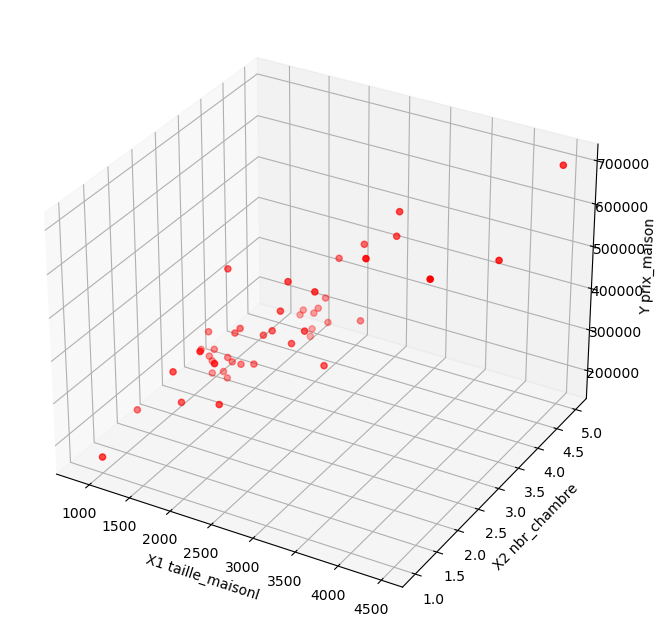

In [4]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1 , X2 , Y, c='r', marker='o')
ax.set_xlabel('X1 taille_maisonl')
ax.set_ylabel('X2 nbr_chambre')
ax.set_zlabel('Y prix_maison')

In [5]:
X1 = X1.reshape(X1.shape[0], 1)
X2 = X2.reshape(X2.shape[0], 1)
Y = Y.reshape(Y.shape[0], 1)

In [6]:
X = np.hstack((X1 , X2 , np.ones(X1.shape)))
X.shape

(47, 3)

In [7]:
theta = np.array([[0],[0],[0]])
theta.shape

(3, 1)

# Modele

In [8]:
def model(X , theta):
    return X.dot(theta)

In [9]:
#fig = plt.figure(figsize=(10,8))


#ax = fig.add_subplot(111, projection='3d')
#ax.scatter(X1 , X2 , Y, c='r', marker='o')


In [10]:
def fonction_cout(X ,Y , theta ):
    m = len(Y)
    return (1/(2*m)) * np.sum((model(X ,theta) - Y)**2)

In [11]:
fonction_cout(X , Y , theta)

65591548106.45744

# Gradient descente

In [12]:
def grad(X , Y , theta):
    m = len(Y)
    return (1/m) * X.T.dot(model(X ,theta) - Y)

In [13]:
def gradient_descent(X , Y ,theta , learning_rate , n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range(0 , n_iterations):
        theta = theta - learning_rate * grad(X,Y,theta)
        cost_history[i] = fonction_cout(X , Y , theta)
    return theta ,  cost_history

# Machine learning

In [14]:
theta_finale , cost_history = gradient_descent(X , Y , theta , learning_rate = 0.0000002 ,n_iterations=1000 )

In [15]:
theta_finale

array([[165.37722891],
       [  3.5577487 ],
       [  1.97819393]])

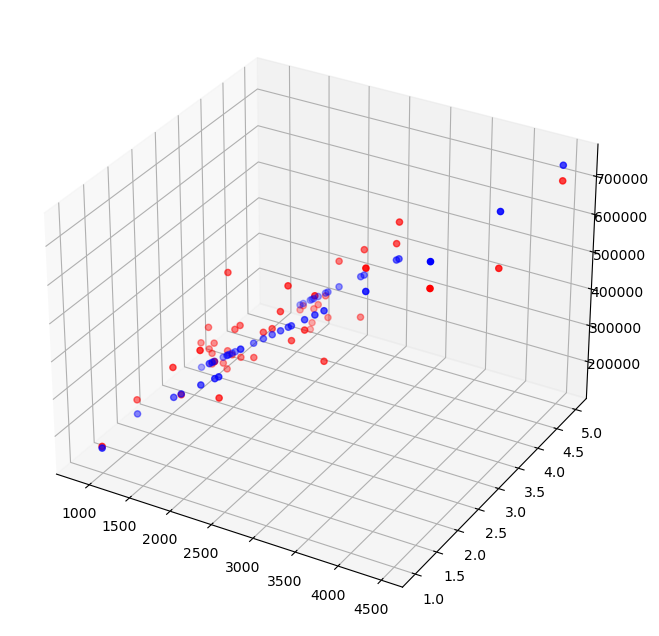

In [16]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1 , X2 , Y, c='r', marker='o')
predictions = model(X , theta_finale)
ax.scatter(X1 , X2 , predictions, c='blue')


In [17]:
def coef_determination(y,pred):
    u=((y - pred)**2).sum()
    v=((y - y.mean())**2).sum()
    return 1 - u/v

In [18]:
coef_determination(Y,predictions)

0.6866111502919012